In [1]:
from alphatools.research import run_pipeline, make_factor_plot
from alphatools.expression import ExpressionAlpha
from alphatools.ics import Sector
from zipline.pipeline.factors import AverageDollarVolume
from zipline.pipeline import Pipeline

In [2]:
universe = AverageDollarVolume(window_length=120).top(500)

In [3]:
expressions = {
    8:  '-1*rank(((sum(opens, 5)*sum(returns, 5))-delay((sum(opens, 5)*sum(returns, 5)),10)))', 
    53: '(-1*delta((((close-low) - (high-close)) / (close-low)), 9))',
    101: '((close - opens) / ((high - low) + .001))',
    102: 'scale((close > delay(close, 1)) ? opens : delay(opens, 1))',
    103: '-rank(stddev(returns, 60))*log(close/delay(close,5))',
    104: 'product(1+returns, 20)',
    105: 'rank(indneutralize(close))',
    'test': 'decay_linear(close,5)',
    'test1': '(delta(close, 5)/close)',
    'test2': '(close/delay(close,5))-1',
    'test3': 'log(close/delay(close,5))',
    
}


In [4]:
e = ExpressionAlpha(expressions[105])
f = ExpressionAlpha(expressions['test2'])
g = ExpressionAlpha(expressions['test3'])

In [5]:
e.parse()
print(e.tree.pretty())

rank
  indneutralize
    close



In [6]:
e.transform()

<alphatools.expression.expression.ExpressionAlpha instance at 0x10c92bb90>

In [7]:
e.generate_pipeline_code()
print(e.pipeline_code)

class ExprAlpha_1(CustomFactor):
    inputs = [Returns(window_length=2), USEP.open, USEP.high,
              USEP.low, USEP.close, USEP.volume, Sector(), SubIndustry()]
    window_length = 2

    def compute(self, today, assets, out, returns, opens, high, low, close, volume, sector, subindustry):
        import pdb
        pdb.set_trace()
        v0 = np.zeros((subindustry.shape[1], subindustry.max()+2))
        v0[np.arange(subindustry.shape[1]), subindustry[-1] + 1] = 1
        v1 = (np.nan_to_num(close.dot(v0)/v0.sum(axis=0))).dot(v0.T)
        v2 = close - v1
        v3 = np.apply_along_axis(rankdata, 1, v2)
        out[:] = v3[-1]



In [8]:
expr_factor = (
    ExpressionAlpha('rank(log(close/delay(close, 5)))').
    make_pipeline_factor().
    pipeline_factor(mask=universe)
)

In [9]:
p = Pipeline(screen=universe)
p.add(e.make_pipeline_factor().pipeline_factor(mask=universe), "Expression Alpha")
#p.add(f.make_pipeline_factor().pipeline_factor(mask=universe), "Expression Alpha1")
#p.add(g.make_pipeline_factor().pipeline_factor(mask=universe), "Expression Alpha2")

start_date = '2014-01-06'
end_date = '2014-01-06'

df = run_pipeline(p, start_date, end_date)

> <string>(9)compute()
(Pdb) l
[EOF]
(Pdb) list
[EOF]
(Pdb) where
  /anaconda3/envs/py27_clean/lib/python2.7/runpy.py(174)_run_module_as_main()
-> "__main__", fname, loader, pkg_name)
  /anaconda3/envs/py27_clean/lib/python2.7/runpy.py(72)_run_code()
-> exec code in run_globals
  /anaconda3/envs/py27_clean/lib/python2.7/site-packages/ipykernel_launcher.py(16)<module>()
-> app.launch_new_instance()
  /anaconda3/envs/py27_clean/lib/python2.7/site-packages/traitlets/config/application.py(658)launch_instance()
-> app.start()
  /anaconda3/envs/py27_clean/lib/python2.7/site-packages/ipykernel/kernelapp.py(486)start()
-> self.io_loop.start()
  /anaconda3/envs/py27_clean/lib/python2.7/site-packages/tornado/ioloop.py(1073)start()
-> handler_func(fd_obj, events)
  /anaconda3/envs/py27_clean/lib/python2.7/site-packages/tornado/stack_context.py(300)null_wrapper()
-> return fn(*args, **kwargs)
  /anaconda3/envs/py27_clean/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py(450)_handle_events()
-

(Pdb) n
> <string>(13)compute()
(Pdb) v2
array([[  5.62100000e+01,   2.53600000e+01,   1.09740000e+02,
          5.53130000e+02,   5.19800000e+01,   6.98900000e+01,
          3.82300000e+01,   1.01700000e+02,   8.11300000e+01,
          5.92900000e+01,   4.92800000e+01,   4.29900000e+01,
          7.98600000e+01,   2.62340000e+02,   4.92500000e+01,
          3.96200000e+01,   4.61300000e+01,   6.75600000e+01,
          6.59600000e+01,   1.68050000e+02,   1.94000000e+01,
          5.07100000e+01,   4.65300000e+01,   5.35500000e+01,
          3.20200000e+01,   1.33440000e+02,   1.75500000e+01,
          3.95000000e+00,   2.13380000e+02,   1.15795000e+02,
          1.13880000e+02,   7.94500000e+01,   3.97970000e+02,
          3.20090000e+01,   7.26000000e+00,   9.06300000e+01,
          8.23600000e+01,   8.54800000e+01,   7.85600000e+01,
          1.11440000e+02,   8.77400000e+01,   7.26000000e+00,
          1.05300000e+01,   1.80700000e+01,   1.18240000e+02,
          5.26500000e+01,   1

(Pdb) n
> <string>(14)compute()
(Pdb) c


In [10]:
df.head()

Expression Alpha
2014-01-06 00:00:00+00:00 Equity(0 [A])                 241.0
                          Equity(2 [AAL])                71.0
                          Equity(7 [AAP])               425.0
                          Equity(8 [AAPL])              495.0
                          Equity(12 [ABBV])             201.0

Formatting factor data for: Expression Alpha
Dropped 0.3% entries from factor data: 0.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Formatting factor data for: Expression Alpha1
Dropped 0.3% entries from factor data: 0.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Formatting factor data for: Expression Alpha2
Dropped 0.3% entries from factor data: 0.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Time to get arrange factor data: 10.47 secs
Time to generate long/short returns: 1.18 secs


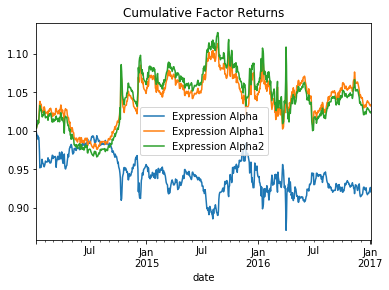

In [61]:
make_factor_plot(df, start_date, end_date);

In [27]:
e = ExpressionAlpha('rank(log(close/delay(opens, 5)))').parse().transform().generate_pipeline_code()

In [28]:
print(e.pipeline_code)

class ExprAlpha_1(CustomFactor):
    inputs = [Returns(window_length=2), USEP.open, USEP.high,
              USEP.low, USEP.close, USEP.volume]
    window_length = 7

    def compute(self, today, assets, out, returns, opens, high, low, close, volume):
        v22 = np.roll(opens, 5, axis=0)
        v23 = close / v22
        v24 = np.log(v23)
        v25 = np.apply_along_axis(rankdata, 1, v24)
        out[:] = v25[-1]



In [29]:
a

NameError: name 'a' is not defined

In [18]:
b

array([[ 0.54254437,  0.14217005],
       [ 0.37334076,  0.67413362],
       [ 0.44183317,  0.43401399],
       [ 0.61776698,  0.51313824],
       [ 0.65039718,  0.60103895],
       [ 0.8052232 ,  0.52164715],
       [ 0.90864888,  0.31923609],
       [ 0.09045935,  0.30070006],
       [ 0.11398436,  0.82868133],
       [ 0.04689632,  0.62628715]])

In [86]:
def column_corr((a, b), window=-1):
    if window==-1:
        window = a.shape[0]
    out = np.zeros(shape = (1, a.shape[1]))
    for i in xrange(a.shape[1]-1):
        out[i] = pearsonr(a[-window:, i], b[-window:, i])[0]
    return out
        

In [34]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
np.random.seed(10)
a = np.random.random(30).reshape(10,3)
b = np.random.random(30).reshape(10,3)

In [35]:
a_1 = pd.DataFrame(a)
b_1 = pd.DataFrame(b)



In [15]:
def roll_corr((a, b), window):
    out = np.ones_like(a)*np.nan
    for i in xrange(window-1, a.shape[0]):   # 2- 10
        #print "%d --> %d" % ((i-(window-1)), i)
        for j in xrange(a.shape[1]):
            out[i, j] = pearsonr(
                a[(i-(window-1)):(i), j], b[(i-(window-1)):(i), j]
            )[0]
    return out

In [36]:
a

array([[ 0.77132064,  0.02075195,  0.63364823],
       [ 0.74880388,  0.49850701,  0.22479665],
       [ 0.19806286,  0.76053071,  0.16911084],
       [ 0.08833981,  0.68535982,  0.95339335],
       [ 0.00394827,  0.51219226,  0.81262096],
       [ 0.61252607,  0.72175532,  0.29187607],
       [ 0.91777412,  0.71457578,  0.54254437],
       [ 0.14217005,  0.37334076,  0.67413362],
       [ 0.44183317,  0.43401399,  0.61776698],
       [ 0.51313824,  0.65039718,  0.60103895]])

In [37]:
np.roll(a, 2, axis=0)

array([[ 0.44183317,  0.43401399,  0.61776698],
       [ 0.51313824,  0.65039718,  0.60103895],
       [ 0.77132064,  0.02075195,  0.63364823],
       [ 0.74880388,  0.49850701,  0.22479665],
       [ 0.19806286,  0.76053071,  0.16911084],
       [ 0.08833981,  0.68535982,  0.95339335],
       [ 0.00394827,  0.51219226,  0.81262096],
       [ 0.61252607,  0.72175532,  0.29187607],
       [ 0.91777412,  0.71457578,  0.54254437],
       [ 0.14217005,  0.37334076,  0.67413362]])

In [16]:
%%timeit
out = roll_corr((a,b), window=5)

1000 loops, best of 3: 645 µs per loop


In [23]:
%%timeit
out = pd.rolling_corr(arg1=a_1, arg2=b_1, window=5)

/anaconda3/envs/py27_clean/lib/python2.7/site-packages/ipykernel_launcher.py:257: FutureWarning: pd.rolling_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5).corr(other=<DataFrame>)


100 loops, best of 3: 10.1 ms per loop


In [12]:
out[-1]

NameError: name 'out' is not defined

In [5]:
#from __future__ import division
v0 = (np.arange(5)+1.)/np.sum(np.arange(5)+1.)

out = a_1.rolling(5).apply(lambda x: (x*v0).sum()).values

In [6]:
v0

array([ 0.06666667,  0.13333333,  0.2       ,  0.26666667,  0.33333333])

In [27]:
out[-1, :]

array([ 0.48050722,  0.55059807,  0.59170856])

In [18]:
from numba import jit

In [19]:
@jit
def roll_corr2((a, b), window):
    out = np.ones_like(a)*np.nan
    for i in xrange(window-1, a.shape[0]):   # 2- 10
        #print "%d --> %d" % ((i-(window-1)), i)
        for j in xrange(a.shape[1]):
            out[i, j] = pearsonr(
                a[(i-(window-1)):(i), j], b[(i-(window-1)):(i), j]
            )[0]
    return out

ValueError: '.0' is not a valid parameter name

In [207]:
def scale(x):
    return (x - np.nanmean(x))/np.nansum(np.abs(x - np.nanmean(x)))

In [211]:
np.apply_along_axis(lambda x: (x - np.nanmean(x))/np.nansum(np.abs(x - np.nanmean(x))), 1, a)

array([[ 0.32572934, -0.5       ,  0.17427066],
       [ 0.4853247 ,  0.0146753 , -0.5       ],
       [-0.23118186,  0.5       , -0.26881814],
       [-0.5       ,  0.11250682,  0.38749318],
       [-0.5       ,  0.07890222,  0.42109778],
       [ 0.14084777,  0.35915223, -0.5       ],
       [ 0.5       , -0.02694105, -0.47305895],
       [-0.45819778, -0.04180222,  0.5       ],
       [-0.23369585, -0.26630415,  0.5       ],
       [-0.5       ,  0.41441077,  0.08558923]])

array([[ 0.77132064,  0.02075195,  0.63364823],
       [ 0.74880388,  0.49850701,  0.22479665],
       [ 0.19806286,  0.76053071,  0.16911084],
       [ 0.08833981,  0.68535982,  0.95339335],
       [ 0.00394827,  0.51219226,  0.81262096],
       [ 0.61252607,  0.72175532,  0.29187607],
       [ 0.91777412,  0.71457578,  0.54254437],
       [ 0.14217005,  0.37334076,  0.67413362],
       [ 0.44183317,  0.43401399,  0.61776698],
       [ 0.51313824,  0.65039718,  0.60103895]])

In [33]:
from __future__ import division

np.sum()

1.0

55

In [20]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
np.random.seed(2)
a = np.random.random(30).reshape(10,3)    # days x stocks
b = np.random.randint(2, 5, size=(1,3))   # Industry cat vars as integers

In [21]:
a

array([[ 0.4359949 ,  0.02592623,  0.54966248],
       [ 0.43532239,  0.4203678 ,  0.33033482],
       [ 0.20464863,  0.61927097,  0.29965467],
       [ 0.26682728,  0.62113383,  0.52914209],
       [ 0.13457995,  0.51357812,  0.18443987],
       [ 0.78533515,  0.85397529,  0.49423684],
       [ 0.84656149,  0.07964548,  0.50524609],
       [ 0.0652865 ,  0.42812233,  0.09653092],
       [ 0.12715997,  0.59674531,  0.226012  ],
       [ 0.10694568,  0.22030621,  0.34982629]])

In [22]:
b.max()+2

6

In [25]:
ohe = np.zeros((b.size, b.max()+2))
ohe[np.arange(b.size),b+1] = 1

In [26]:
ohe.T

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  0.],
       [ 1.,  0.,  1.]])

In [27]:
ind_mean = np.nan_to_num(a.dot(ohe)/ohe.sum(axis=0))

In [28]:
ind_mean

array([[ 0.        ,  0.        ,  0.        ,  0.02592623,  0.        ,
         0.49282869],
       [ 0.        ,  0.        ,  0.        ,  0.4203678 ,  0.        ,
         0.38282861],
       [ 0.        ,  0.        ,  0.        ,  0.61927097,  0.        ,
         0.25215165],
       [ 0.        ,  0.        ,  0.        ,  0.62113383,  0.        ,
         0.39798468],
       [ 0.        ,  0.        ,  0.        ,  0.51357812,  0.        ,
         0.15950991],
       [ 0.        ,  0.        ,  0.        ,  0.85397529,  0.        ,
         0.63978599],
       [ 0.        ,  0.        ,  0.        ,  0.07964548,  0.        ,
         0.67590379],
       [ 0.        ,  0.        ,  0.        ,  0.42812233,  0.        ,
         0.08090871],
       [ 0.        ,  0.        ,  0.        ,  0.59674531,  0.        ,
         0.17658599],
       [ 0.        ,  0.        ,  0.        ,  0.22030621,  0.        ,
         0.22838598]])

In [29]:
per_stock_ind_mean = ind_mean.dot(ohe.T)

In [30]:
per_stock_ind_mean # per stock ind_mean by day!

array([[ 0.49282869,  0.02592623,  0.49282869],
       [ 0.38282861,  0.4203678 ,  0.38282861],
       [ 0.25215165,  0.61927097,  0.25215165],
       [ 0.39798468,  0.62113383,  0.39798468],
       [ 0.15950991,  0.51357812,  0.15950991],
       [ 0.63978599,  0.85397529,  0.63978599],
       [ 0.67590379,  0.07964548,  0.67590379],
       [ 0.08090871,  0.42812233,  0.08090871],
       [ 0.17658599,  0.59674531,  0.17658599],
       [ 0.22838598,  0.22030621,  0.22838598]])

In [31]:
a

array([[ 0.4359949 ,  0.02592623,  0.54966248],
       [ 0.43532239,  0.4203678 ,  0.33033482],
       [ 0.20464863,  0.61927097,  0.29965467],
       [ 0.26682728,  0.62113383,  0.52914209],
       [ 0.13457995,  0.51357812,  0.18443987],
       [ 0.78533515,  0.85397529,  0.49423684],
       [ 0.84656149,  0.07964548,  0.50524609],
       [ 0.0652865 ,  0.42812233,  0.09653092],
       [ 0.12715997,  0.59674531,  0.226012  ],
       [ 0.10694568,  0.22030621,  0.34982629]])

In [32]:
a - per_stock_ind_mean

array([[-0.05683379,  0.        ,  0.05683379],
       [ 0.05249379,  0.        , -0.05249379],
       [-0.04750302,  0.        ,  0.04750302],
       [-0.13115741,  0.        ,  0.13115741],
       [-0.02492996,  0.        ,  0.02492996],
       [ 0.14554916,  0.        , -0.14554916],
       [ 0.1706577 ,  0.        , -0.1706577 ],
       [-0.01562221,  0.        ,  0.01562221],
       [-0.04942601,  0.        ,  0.04942601],
       [-0.1214403 ,  0.        ,  0.1214403 ]])